## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9679805	total: 57.5ms	remaining: 57.4s
1:	learn: 0.9470732	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9278010	total: 60ms	remaining: 20s
3:	learn: 0.9100072	total: 61.1ms	remaining: 15.2s
4:	learn: 0.8926955	total: 62ms	remaining: 12.3s
5:	learn: 0.8761633	total: 63ms	remaining: 10.4s
6:	learn: 0.8619617	total: 63.9ms	remaining: 9.07s
7:	learn: 0.8462721	total: 64.7ms	remaining: 8.03s
8:	learn: 0.8312091	total: 65.5ms	remaining: 7.22s
9:	learn: 0.8151889	total: 66.4ms	remaining: 6.58s
10:	learn: 0.7994496	total: 67.3ms	remaining: 6.05s
11:	learn: 0.7846499	total: 68.1ms	remaining: 5.61s
12:	learn: 0.7706018	total: 69.1ms	remaining: 5.24s
13:	learn: 0.7556370	total: 69.9ms	remaining: 4.92s
14:	learn: 0.7438831	total: 70.8ms	remaining: 4.65s
15:	learn: 0.7291315	total: 71.8ms	remaining: 4.41s
16:	learn: 0.7162581	total: 72.6ms	remaining: 4.2s
17:	learn: 0.7054544	total: 73.7ms	remaining: 4.02s
18:	learn: 0.6933592	total: 75.4ms	remaining: 3.89s
1

27:	learn: 0.6020885	total: 84.1ms	remaining: 2.92s
28:	learn: 0.5919473	total: 85ms	remaining: 2.85s
29:	learn: 0.5821347	total: 86ms	remaining: 2.78s
30:	learn: 0.5728662	total: 87ms	remaining: 2.72s
31:	learn: 0.5636982	total: 88ms	remaining: 2.66s
32:	learn: 0.5564621	total: 88.8ms	remaining: 2.6s
33:	learn: 0.5486997	total: 89.6ms	remaining: 2.55s
34:	learn: 0.5423454	total: 90.6ms	remaining: 2.5s
35:	learn: 0.5345792	total: 91.5ms	remaining: 2.45s
36:	learn: 0.5285523	total: 92.4ms	remaining: 2.4s
37:	learn: 0.5211718	total: 93.2ms	remaining: 2.36s
38:	learn: 0.5143492	total: 94.1ms	remaining: 2.32s
39:	learn: 0.5065714	total: 94.8ms	remaining: 2.27s
40:	learn: 0.5004987	total: 95.8ms	remaining: 2.24s
41:	learn: 0.4935807	total: 96.6ms	remaining: 2.2s
42:	learn: 0.4886067	total: 97.6ms	remaining: 2.17s
43:	learn: 0.4826957	total: 98.4ms	remaining: 2.14s
44:	learn: 0.4778901	total: 99.1ms	remaining: 2.1s
45:	learn: 0.4729493	total: 99.8ms	remaining: 2.07s
46:	learn: 0.4663698	tota

125:	learn: 0.2703142	total: 167ms	remaining: 1.16s
126:	learn: 0.2688437	total: 167ms	remaining: 1.15s
127:	learn: 0.2677347	total: 168ms	remaining: 1.15s
128:	learn: 0.2666377	total: 169ms	remaining: 1.14s
129:	learn: 0.2658175	total: 170ms	remaining: 1.14s
130:	learn: 0.2647780	total: 171ms	remaining: 1.13s
131:	learn: 0.2638455	total: 171ms	remaining: 1.13s
132:	learn: 0.2628407	total: 172ms	remaining: 1.12s
133:	learn: 0.2619215	total: 173ms	remaining: 1.12s
134:	learn: 0.2611816	total: 174ms	remaining: 1.11s
135:	learn: 0.2603327	total: 175ms	remaining: 1.11s
136:	learn: 0.2597162	total: 176ms	remaining: 1.11s
137:	learn: 0.2589279	total: 176ms	remaining: 1.1s
138:	learn: 0.2578211	total: 177ms	remaining: 1.1s
139:	learn: 0.2568425	total: 178ms	remaining: 1.09s
140:	learn: 0.2561005	total: 179ms	remaining: 1.09s
141:	learn: 0.2552169	total: 180ms	remaining: 1.09s
142:	learn: 0.2543056	total: 181ms	remaining: 1.08s
143:	learn: 0.2530923	total: 182ms	remaining: 1.08s
144:	learn: 0.

254:	learn: 0.1883326	total: 273ms	remaining: 799ms
255:	learn: 0.1880217	total: 275ms	remaining: 798ms
256:	learn: 0.1874938	total: 276ms	remaining: 797ms
257:	learn: 0.1870837	total: 276ms	remaining: 795ms
258:	learn: 0.1866872	total: 277ms	remaining: 793ms
259:	learn: 0.1861570	total: 278ms	remaining: 791ms
260:	learn: 0.1856125	total: 279ms	remaining: 790ms
261:	learn: 0.1850950	total: 280ms	remaining: 788ms
262:	learn: 0.1846933	total: 281ms	remaining: 786ms
263:	learn: 0.1842705	total: 281ms	remaining: 784ms
264:	learn: 0.1837729	total: 282ms	remaining: 783ms
265:	learn: 0.1833906	total: 283ms	remaining: 781ms
266:	learn: 0.1830763	total: 284ms	remaining: 779ms
267:	learn: 0.1825848	total: 285ms	remaining: 777ms
268:	learn: 0.1821445	total: 286ms	remaining: 776ms
269:	learn: 0.1817561	total: 286ms	remaining: 774ms
270:	learn: 0.1812196	total: 287ms	remaining: 773ms
271:	learn: 0.1808918	total: 288ms	remaining: 772ms
272:	learn: 0.1802958	total: 289ms	remaining: 770ms
273:	learn: 

352:	learn: 0.1534167	total: 357ms	remaining: 654ms
353:	learn: 0.1533342	total: 358ms	remaining: 653ms
354:	learn: 0.1530456	total: 359ms	remaining: 651ms
355:	learn: 0.1525567	total: 359ms	remaining: 650ms
356:	learn: 0.1523759	total: 360ms	remaining: 649ms
357:	learn: 0.1521348	total: 361ms	remaining: 647ms
358:	learn: 0.1517934	total: 362ms	remaining: 646ms
359:	learn: 0.1517073	total: 363ms	remaining: 644ms
360:	learn: 0.1514407	total: 363ms	remaining: 643ms
361:	learn: 0.1510457	total: 364ms	remaining: 642ms
362:	learn: 0.1509239	total: 365ms	remaining: 640ms
363:	learn: 0.1508982	total: 366ms	remaining: 639ms
364:	learn: 0.1506291	total: 367ms	remaining: 638ms
365:	learn: 0.1504041	total: 367ms	remaining: 636ms
366:	learn: 0.1500712	total: 368ms	remaining: 635ms
367:	learn: 0.1497136	total: 369ms	remaining: 634ms
368:	learn: 0.1493268	total: 370ms	remaining: 633ms
369:	learn: 0.1490106	total: 371ms	remaining: 632ms
370:	learn: 0.1485468	total: 372ms	remaining: 631ms
371:	learn: 

478:	learn: 0.1265381	total: 464ms	remaining: 505ms
479:	learn: 0.1263016	total: 465ms	remaining: 504ms
480:	learn: 0.1260531	total: 466ms	remaining: 503ms
481:	learn: 0.1258276	total: 467ms	remaining: 502ms
482:	learn: 0.1255821	total: 468ms	remaining: 501ms
483:	learn: 0.1255499	total: 469ms	remaining: 500ms
484:	learn: 0.1254947	total: 469ms	remaining: 498ms
485:	learn: 0.1253443	total: 470ms	remaining: 497ms
486:	learn: 0.1251899	total: 471ms	remaining: 496ms
487:	learn: 0.1251675	total: 472ms	remaining: 495ms
488:	learn: 0.1250018	total: 473ms	remaining: 494ms
489:	learn: 0.1249490	total: 473ms	remaining: 493ms
490:	learn: 0.1246544	total: 474ms	remaining: 492ms
491:	learn: 0.1246214	total: 475ms	remaining: 491ms
492:	learn: 0.1245642	total: 476ms	remaining: 490ms
493:	learn: 0.1243666	total: 477ms	remaining: 488ms
494:	learn: 0.1238715	total: 478ms	remaining: 487ms
495:	learn: 0.1237186	total: 479ms	remaining: 486ms
496:	learn: 0.1236357	total: 479ms	remaining: 485ms
497:	learn: 

576:	learn: 0.1106032	total: 547ms	remaining: 401ms
577:	learn: 0.1105078	total: 548ms	remaining: 400ms
578:	learn: 0.1103091	total: 549ms	remaining: 399ms
579:	learn: 0.1102451	total: 550ms	remaining: 398ms
580:	learn: 0.1100588	total: 551ms	remaining: 397ms
581:	learn: 0.1098965	total: 551ms	remaining: 396ms
582:	learn: 0.1097079	total: 552ms	remaining: 395ms
583:	learn: 0.1094873	total: 553ms	remaining: 394ms
584:	learn: 0.1091597	total: 555ms	remaining: 393ms
585:	learn: 0.1089405	total: 556ms	remaining: 392ms
586:	learn: 0.1087960	total: 556ms	remaining: 391ms
587:	learn: 0.1086709	total: 557ms	remaining: 390ms
588:	learn: 0.1084799	total: 558ms	remaining: 389ms
589:	learn: 0.1082224	total: 559ms	remaining: 388ms
590:	learn: 0.1079647	total: 560ms	remaining: 387ms
591:	learn: 0.1079165	total: 561ms	remaining: 387ms
592:	learn: 0.1078558	total: 562ms	remaining: 386ms
593:	learn: 0.1077374	total: 563ms	remaining: 385ms
594:	learn: 0.1076160	total: 564ms	remaining: 384ms
595:	learn: 

702:	learn: 0.0918780	total: 654ms	remaining: 277ms
703:	learn: 0.0917585	total: 656ms	remaining: 276ms
704:	learn: 0.0915903	total: 656ms	remaining: 275ms
705:	learn: 0.0914745	total: 657ms	remaining: 274ms
706:	learn: 0.0914389	total: 658ms	remaining: 273ms
707:	learn: 0.0913633	total: 659ms	remaining: 272ms
708:	learn: 0.0913253	total: 660ms	remaining: 271ms
709:	learn: 0.0912392	total: 661ms	remaining: 270ms
710:	learn: 0.0910344	total: 661ms	remaining: 269ms
711:	learn: 0.0909612	total: 662ms	remaining: 268ms
712:	learn: 0.0909002	total: 663ms	remaining: 267ms
713:	learn: 0.0908566	total: 664ms	remaining: 266ms
714:	learn: 0.0907056	total: 665ms	remaining: 265ms
715:	learn: 0.0906458	total: 666ms	remaining: 264ms
716:	learn: 0.0904940	total: 666ms	remaining: 263ms
717:	learn: 0.0904654	total: 667ms	remaining: 262ms
718:	learn: 0.0904462	total: 668ms	remaining: 261ms
719:	learn: 0.0903597	total: 669ms	remaining: 260ms
720:	learn: 0.0902642	total: 670ms	remaining: 259ms
721:	learn: 

800:	learn: 0.0800712	total: 737ms	remaining: 183ms
801:	learn: 0.0799230	total: 738ms	remaining: 182ms
802:	learn: 0.0797845	total: 739ms	remaining: 181ms
803:	learn: 0.0796306	total: 740ms	remaining: 180ms
804:	learn: 0.0795943	total: 740ms	remaining: 179ms
805:	learn: 0.0795065	total: 741ms	remaining: 178ms
806:	learn: 0.0793565	total: 742ms	remaining: 177ms
807:	learn: 0.0792101	total: 743ms	remaining: 176ms
808:	learn: 0.0791072	total: 744ms	remaining: 176ms
809:	learn: 0.0790289	total: 744ms	remaining: 175ms
810:	learn: 0.0789351	total: 745ms	remaining: 174ms
811:	learn: 0.0788661	total: 746ms	remaining: 173ms
812:	learn: 0.0787466	total: 747ms	remaining: 172ms
813:	learn: 0.0785778	total: 748ms	remaining: 171ms
814:	learn: 0.0784826	total: 749ms	remaining: 170ms
815:	learn: 0.0783367	total: 750ms	remaining: 169ms
816:	learn: 0.0782604	total: 750ms	remaining: 168ms
817:	learn: 0.0781175	total: 751ms	remaining: 167ms
818:	learn: 0.0780719	total: 752ms	remaining: 166ms
819:	learn: 

928:	learn: 0.0679638	total: 844ms	remaining: 64.5ms
929:	learn: 0.0678179	total: 845ms	remaining: 63.6ms
930:	learn: 0.0676747	total: 846ms	remaining: 62.7ms
931:	learn: 0.0676084	total: 847ms	remaining: 61.8ms
932:	learn: 0.0675231	total: 848ms	remaining: 60.9ms
933:	learn: 0.0673934	total: 849ms	remaining: 60ms
934:	learn: 0.0673856	total: 850ms	remaining: 59.1ms
935:	learn: 0.0673181	total: 851ms	remaining: 58.2ms
936:	learn: 0.0672657	total: 851ms	remaining: 57.2ms
937:	learn: 0.0672250	total: 852ms	remaining: 56.3ms
938:	learn: 0.0671198	total: 853ms	remaining: 55.4ms
939:	learn: 0.0669634	total: 854ms	remaining: 54.5ms
940:	learn: 0.0668560	total: 855ms	remaining: 53.6ms
941:	learn: 0.0667576	total: 856ms	remaining: 52.7ms
942:	learn: 0.0666460	total: 856ms	remaining: 51.8ms
943:	learn: 0.0665382	total: 857ms	remaining: 50.8ms
944:	learn: 0.0664191	total: 858ms	remaining: 49.9ms
945:	learn: 0.0663634	total: 859ms	remaining: 49ms
946:	learn: 0.0663522	total: 860ms	remaining: 48.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

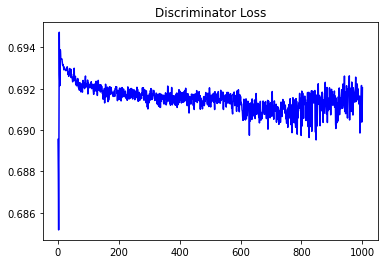

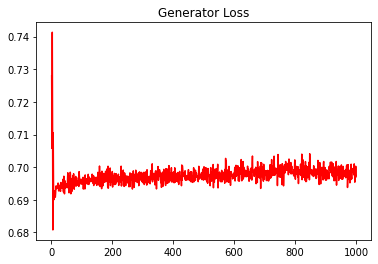

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13315711353936285


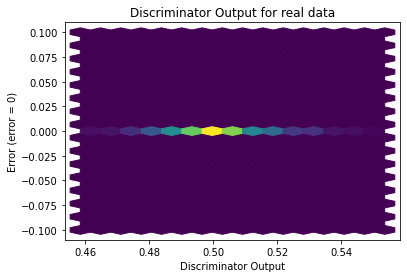

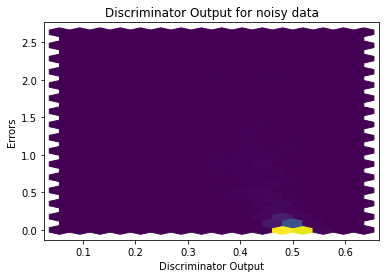

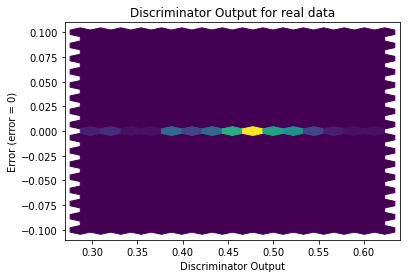

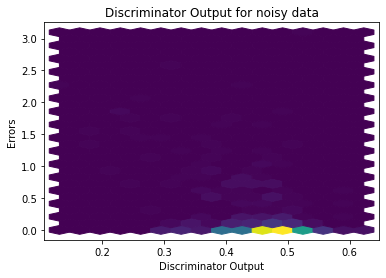

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


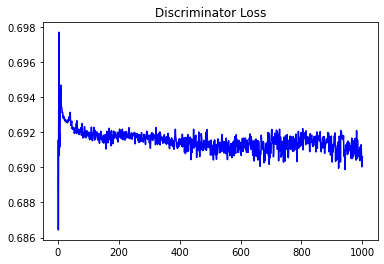

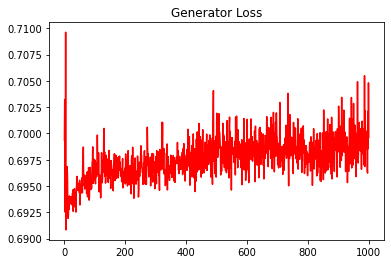

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1499466312778632


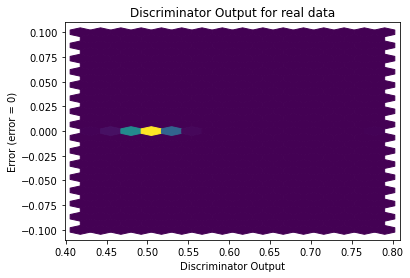

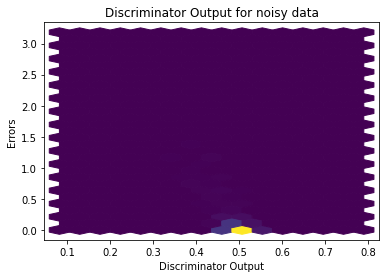

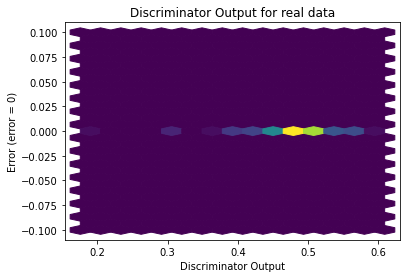

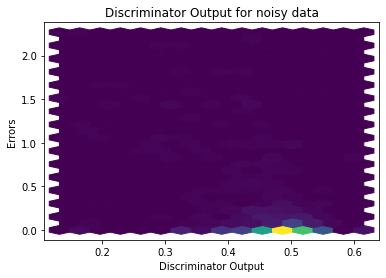

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9897]], requires_grad=True)
